###### 了解数据
导入模块

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

加载数据

In [39]:
df1 = pd.read_csv('流行电影评分预测1.csv')
df2 = pd.read_csv('流行电影评分预测2.csv')

删除冗余特征

In [40]:
df1.drop(columns=['Unnamed: 0'], inplace=True)
df2.drop(columns=['Unnamed: 0'], inplace=True)

拼接数据

In [41]:
df = pd.merge(df1, df2, on='影片', how='inner')

查看数据样式

In [42]:
df.value_counts()

影片                        类型                          简介                                                                                                                                                                                                                                                                                                                                        导演                  主演                                                                      年份    时长      评分   票房    
The Skin I Live In        Drama,Thriller              A brilliant plastic surgeon, haunted by past tragedies, creates a type of synthetic skin that withstands any kind of damage. His guinea pig: a mysterious and volatile woman who holds the key to his obsession.                                                                                                                          Pedro Almodóvar     Antonio Banderas, Elena Anaya, Jan Cornet,Marisa Paredes                2011  120min  7.6  3.1

查看数据形状，样本数量

In [43]:
df.shape

(1066, 9)

In [44]:
len(df)

1066

查看缺失值大概情况

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   影片      1066 non-null   object 
 1   类型      1066 non-null   object 
 2   简介      1066 non-null   object 
 3   导演      1066 non-null   object 
 4   主演      1066 non-null   object 
 5   年份      1059 non-null   object 
 6   时长      1066 non-null   object 
 7   评分      1059 non-null   object 
 8   票房      920 non-null    float64
dtypes: float64(1), object(8)
memory usage: 75.1+ KB


查看数据统计特征

In [46]:
df.describe(include='all')

,影片,类型,简介,导演,主演,年份,时长,评分,票房
count,1066,1066,1066,1066,1066,1059,1066,1059,920.000000
unique,967,206,968,626,964,15,96,56,NaN
top,Nine Lives,Drama,A stuffy businessman finds himself trapped ins...,Paul W.S. Anderson,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,92min,7.1,NaN
freq,4,50,4,9,4,280,33,54,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.753402
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.324979
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.765000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.800000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.630000


###### 数据处理

重复值

In [47]:
df.duplicated().sum()

93

In [48]:
duplicate_rows = df.duplicated()
duplicate_data = df[duplicate_rows]
duplicate_data

,影片,类型,简介,导演,主演,年份,时长,评分,票房
939,Wrecker,"Action,Horror,Thriller",Best friends Emily and Lesley go on a road tri...,Micheal Bafaro,"Anna Hutchison, Andrea Whitburn, Jennifer Koen...",2015,83min,3.5,NaN
940,Wrecker,"Action,Horror,Thriller",Best friends Emily and Lesley go on a road tri...,Micheal Bafaro,"Anna Hutchison, Andrea Whitburn, Jennifer Koen...",2015,83min,3.5,NaN
941,Wrecker,"Action,Horror,Thriller",Best friends Emily and Lesley go on a road tri...,Micheal Bafaro,"Anna Hutchison, Andrea Whitburn, Jennifer Koen...",2015,83min,3.5,NaN
943,The Lone Ranger,"Action,Adventure,Western",Native American warrior Tonto recounts the unt...,Gore Verbinski,"Johnny Depp, Armie Hammer, William Fichtner,To...",2013,150min,6.5,89.29
944,The Lone Ranger,"Action,Adventure,Western",Native American warrior Tonto recounts the unt...,Gore Verbinski,"Johnny Depp, Armie Hammer, William Fichtner,To...",2013,150min,6.5,89.29
...,...,...,...,...,...,...,...,...,...
1057,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,1h38min,6.2,58.01
1060,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93min,5.6,NaN
1061,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,1h23min,5.6,NaN
1064,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87min,5.3,19.64


In [49]:
df.drop_duplicates(inplace=True)  # 保留第一个

In [50]:
df.duplicated().sum()

0

缺失值处理

In [51]:
# 清洗年份列，将特殊字符替换为NaN或空字符串
df['年份'] = df['年份'].str.replace(r'\D', '', regex=True).replace('', pd.NA)

# 清洗评分列，将特殊字符替换为NaN或空字符串
df['评分'] = df['评分'].str.replace(r'[^0-9.]+', '', regex=True).replace('', pd.NA)  # ^出现在[]内 表示取反

# 将年份列转换为整数类型
df['年份'] = df['年份'].astype('Int32')

# 填充年份、评分和票房列的缺失值
df['年份'].fillna(df['年份'].median(), inplace=True)
df['评分'].fillna(df['评分'].median(), inplace=True)
df['票房'].fillna(df['票房'].mode()[0], inplace=True)

# 将评分列转换为整数类型
df['评分'] = df['评分'].astype('float')
# df['票房'] = df['票房'].astype('float')


将“时长”统一格式

In [52]:
# 检查时长列是否都是数字+min结尾
is_valid_duration = df['时长'].str.match(r'^\d+min$')

# 打印不符合条件的行
for index in  df[~is_valid_duration].index:
    # 提取时长中的小时和分钟信息
    duration_hours = int(df.loc[index, '时长'].split('h')[0])
    duration_minutes = int(df.loc[index, '时长'].split('h')[1].replace('min', ''))

    # 将小时和分钟转化为分钟数
    # total_duration_minutes = str(duration_hours * 60 + duration_minutes) + 'min'
    total_duration_minutes = str(duration_hours * 60 + duration_minutes) + 'min'

    # 更新时长列为转化后的分钟数
    df.loc[index, '时长'] = total_duration_minutes


In [53]:
df.drop_duplicates(inplace=True)

In [54]:
df.isna().sum()

影片    0
类型    0
简介    0
导演    0
主演    0
年份    0
时长    0
评分    0
票房    0
dtype: int64

In [55]:
df.isnull().sum()

影片    0
类型    0
简介    0
导演    0
主演    0
年份    0
时长    0
评分    0
票房    0
dtype: int64

In [56]:
df.dtypes

影片     object
类型     object
简介     object
导演     object
主演     object
年份      Int32
时长     object
评分    float64
票房    float64
dtype: object

In [57]:
df.value_counts()

影片                                                类型                          简介                                                                                                                                                                                                                                                                                                                                        导演               主演                                                                         年份    时长      评分   票房    
(500) Days of Summer                              Comedy,Drama,Romance        An offbeat romantic comedy about a woman who doesn't believe true love exists, and the young man who falls for her.                                                                                                                                                                                                                       Marc Webb        Zooey Deschanel, Joseph Gordon-Levitt, Geoffrey A

###### 需求分析
 统计电影“类型”分布，并进行绘图展示

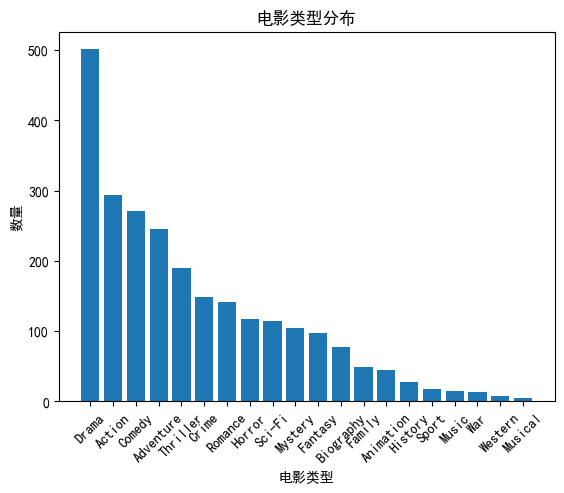

In [58]:
type_counts = df['类型'].str.split(',', expand=True).stack().value_counts()

plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置字体为SimHei
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示异常的问题

plt.bar(type_counts.index, type_counts.values)
plt.xlabel('电影类型')
plt.ylabel('数量')
plt.title('电影类型分布')
plt.xticks(rotation=45)  # 旋转x坐标标签
plt.show()

统计导演和演员人数，并获取前三名

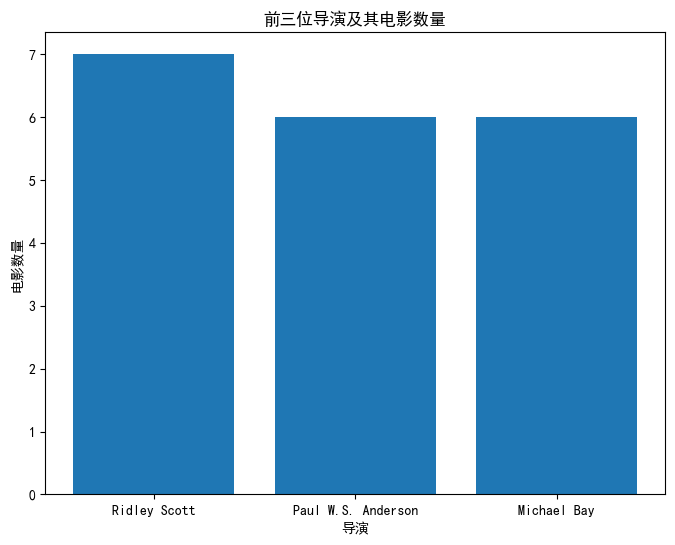

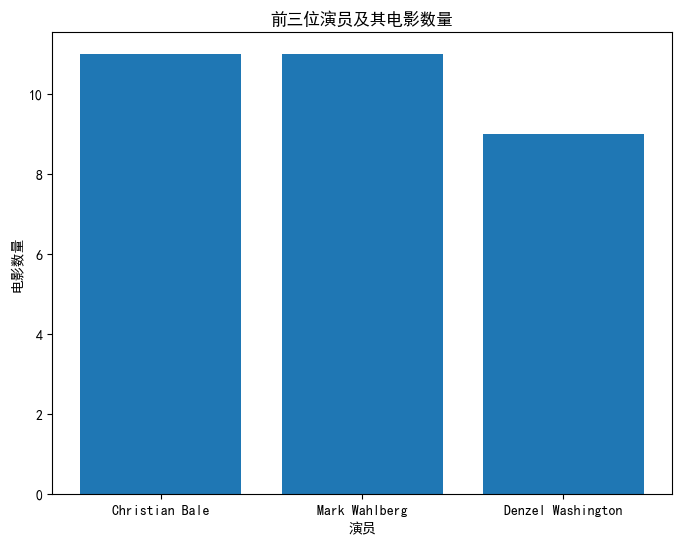

导演人数： 626
演员人数： 2345
前三位导演：
Ridley Scott          7
Paul W.S. Anderson    6
Michael Bay           6
Name: count, dtype: int64
前三位演员：
Christian Bale       11
Mark Wahlberg        11
Denzel Washington     9
Name: count, dtype: int64


In [59]:
directors = set()
actors = set()

for directors_str, actors_str in zip(df['导演'], df['主演']):
    directors.update(directors_str.split(','))
    actors.update(actors_str.split(','))

directors_count = len(directors)
actors_count = len(actors)

top_directors = df['导演'].str.split(',', expand=True).stack().value_counts().head(3)
top_actors = df['主演'].str.split(',', expand=True).stack().value_counts().head(3)

# 绘制导演人数和前三位导演的柱状图
plt.figure(figsize=(8, 6))
plt.bar(range(len(top_directors)), top_directors.values)
plt.xlabel('导演')
plt.ylabel('电影数量')
plt.title('前三位导演及其电影数量')
plt.xticks(range(len(top_directors)), top_directors.index)
plt.show()

# 绘制演员人数和前三位演员的柱状图
plt.figure(figsize=(8, 6))
plt.bar(range(len(top_actors)), top_actors.values)
plt.xlabel('演员')
plt.ylabel('电影数量')
plt.title('前三位演员及其电影数量')
plt.xticks(range(len(top_actors)), top_actors.index)
plt.show()


print("导演人数：", directors_count)
print("演员人数：", actors_count)
print("前三位导演：")
print(top_directors)
print("前三位演员：")
print(top_actors)

对 '时长'、'票房' 进行分组，探究不同票房不同时长对评分的影响

In [60]:
df['时长'] = df['时长'].str.replace('min','').astype('float')

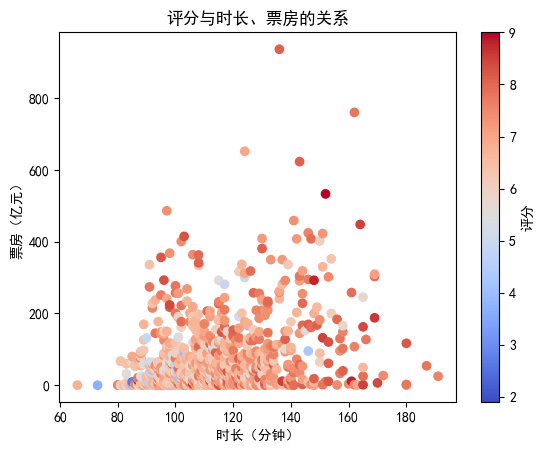

In [61]:
# 对时长和票房进行分组

# df['评分'] = pd.to_numeric(df['评分'], errors='coerce')

grouped = df.groupby(['时长', '票房'])['评分'].mean().reset_index()
# grouped['评分']
# 绘制散点图
plt.scatter(grouped['时长'], grouped['票房'], c=grouped['评分'], cmap='coolwarm')
plt.colorbar(label='评分')
plt.xlabel('时长（分钟）')
plt.ylabel('票房（亿元）')
plt.title('评分与时长、票房的关系')
plt.show()

#### 人工智能导论
- 将“类型”进行 one-hot 编码
- 确定特征值、目标值
- 解决类别不均衡：欠采样、过采样
- 消除特征量纲：标准化、归一化
- 划分数据集，train:test = 3:1

In [62]:
# Step 1: One-Hot编码
encoded_df = pd.get_dummies(df, columns=['类型'])

In [63]:
# Step 2: 确定特征值和目标值
features = encoded_df.drop(['评分','影片','简介','导演','主演'], axis=1)
target = encoded_df['评分']

In [64]:
features.value_counts()

年份    时长     票房     类型_Action  类型_Action,Adventure  类型_Action,Adventure,Biography  类型_Action,Adventure,Comedy  类型_Action,Adventure,Crime  类型_Action,Adventure,Drama  类型_Action,Adventure,Family  类型_Action,Adventure,Fantasy  类型_Action,Adventure,Horror  类型_Action,Adventure,Mystery  类型_Action,Adventure,Romance  类型_Action,Adventure,Sci-Fi  类型_Action,Adventure,Thriller  类型_Action,Adventure,Western  类型_Action,Biography,Crime  类型_Action,Biography,Drama  类型_Action,Comedy  类型_Action,Comedy,Crime  类型_Action,Comedy,Family  类型_Action,Comedy,Fantasy  类型_Action,Comedy,Horror  类型_Action,Comedy,Mystery  类型_Action,Comedy,Romance  类型_Action,Comedy,Sci-Fi  类型_Action,Comedy,Sport  类型_Action,Crime,Drama  类型_Action,Crime,Fantasy  类型_Action,Crime,Mystery  类型_Action,Crime,Sci-Fi  类型_Action,Crime,Sport  类型_Action,Crime,Thriller  类型_Action,Drama,Family  类型_Action,Drama,Fantasy  类型_Action,Drama,History  类型_Action,Drama,Horror  类型_Action,Drama,Mystery  类型_Action,Drama,Romance  类型_Action,Drama,Sci-Fi  类型_Action,Dram

In [65]:
# Step 3: 解决类别不均衡
## 因为目标变量连续 转化为分类问题得手动划分区间

# 定义评分范围和对应的类别标签
bins = [0,3,7,9]
labels = ['低', '中', '高']

# 新 * 目标值
target_class = pd.cut(df['评分'], bins=bins, labels=labels)

In [66]:
# # 过采样
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
features_resampled, target_resampled = ros.fit_resample(features, target_class)

In [67]:
target_resampled.value_counts()

评分
低    588
中    588
高    588
Name: count, dtype: int64

In [68]:
# Step 4: 消除特征量纲
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 5: 划分数据集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target_class, test_size=1/3)

In [69]:
y_train

331    中
990    中
469    高
364    中
621    中
      ..
49     高
838    中
986    中
916    高
474    高
Name: 评分, Length: 647, dtype: category
Categories (3, object): ['低' < '中' < '高']

In [70]:
# 随机森林模型进行基础训练和调优：

In [71]:
## 模型基础训练
# 使用决策树模型进行基础训练和评估
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("决策树模型的准确率：", accuracy_dt)

决策树模型的准确率： 0.6790123456790124


In [72]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score
# from statistics import mean
#
# accuracy_knn1 = []
# accuracy_lr1 = []
# accuracy_dt1 = []
#
# for i in range(1, 500):
#     # 使用KNN模型进行基础训练和评估
#     knn = KNeighborsClassifier()
#     knn.fit(X_train, y_train)
#     y_pred_knn = knn.predict(X_test)
#     accuracy_knn = accuracy_score(y_test, y_pred_knn)
#     accuracy_knn1.append(accuracy_knn)
#
#     # 使用逻辑回归模型进行基础训练和评估
#     lr = LogisticRegression()
#     lr.fit(X_train, y_train)
#     y_pred_lr = lr.predict(X_test)
#     accuracy_lr = accuracy_score(y_test, y_pred_lr)
#     accuracy_lr1.append(accuracy_lr)
#
#     # 使用决策树模型进行基础训练和评估
#     dt = DecisionTreeClassifier()
#     dt.fit(X_train, y_train)
#     y_pred_dt = dt.predict(X_test)
#     accuracy_dt = accuracy_score(y_test, y_pred_dt)
#     accuracy_dt1.append(accuracy_dt)
#
# avg_accuracy_knn = round(mean(accuracy_knn1) * 100, 2)
# avg_accuracy_lr = round(mean(accuracy_lr1) * 100, 2)
# avg_accuracy_dt = round(mean(accuracy_dt1) * 100, 2)
#
# print("KNN模型的平均准确率：", avg_accuracy_knn, "%")
# print("逻辑回归模型的平均准确率：", avg_accuracy_lr, "%")
# print("决策树模型的平均准确率：", avg_accuracy_dt, "%")

In [73]:
# 模型调优

In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# 定义随机森林模型
rf_model = RandomForestClassifier()

# 定义GBDT模型
gbdt_model = GradientBoostingClassifier()

# 定义参数网格
rf_param_grid = {
    'n_estimators': [100, 200, 300], ##决策树的数量（默认值为100）
    'criterion': ['gini', 'entropy'],##衡量分割质量的函数，可以选择"gini"或"entropy"（默认值为"gini"）
    'max_depth': [None, 5, 10], ## 决策树的最大深度，控制树的生长程度（默认值为None，表示不限制深度）
    'min_samples_split': [2, 5, 10], ## 进行分割所需的最小样本数（默认值为2）
    'min_samples_leaf': [1, 2, 4], ## 叶节点上所需的最小样本数（默认值为1）
}

gbdt_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.5, 1.0], ## 学习率，控制每个树的贡献（默认值为0.1）
    'max_depth': [3, 5, 7], ## 决策树的最大深度，控制树的生长程度（默认值为3）
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# 定义网格搜索对象
rf_grid_search = GridSearchCV(rf_model, param_grid=rf_param_grid, cv=3)
gbdt_grid_search = GridSearchCV(gbdt_model, param_grid=gbdt_param_grid, cv=3)

# 执行网格搜索
rf_grid_search.fit(X_train, y_train)
gbdt_grid_search.fit(X_train, y_train)

# 获取最优参数组合
rf_best_params = rf_grid_search.best_params_
gbdt_best_params = gbdt_grid_search.best_params_

# 使用最优参数组合构建模型
rf_best_model = RandomForestClassifier(**rf_best_params)
gbdt_best_model = GradientBoostingClassifier(**gbdt_best_params)

# 使用测试集评估模型性能
rf_best_model.fit(X_train, y_train)
gbdt_best_model.fit(X_train, y_train)

rf_accuracy = rf_best_model.score(X_test, y_test)
gbdt_accuracy = gbdt_best_model.score(X_test, y_test)

print("随机森林模型准确率：", rf_accuracy)
print("GBDT模型准确率：", gbdt_accuracy)

随机森林模型准确率： 0.6975308641975309
GBDT模型准确率： 0.6790123456790124
